In [1]:
#1
import xarray as xr
import numpy as np
import cartopy as c
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
#2
xr.open_mfdataset('C:\\Users\\paul\\Desktop\\USA\*.nc')

<xarray.Dataset>
Dimensions:   (lon: 242, lat: 129, datetime: 3288)
Coordinates:
  * lon       (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat       (lat) float32 49.75 49.5 49.25 49.0 ... 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-01-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 129, 242), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [3]:
#3
usa_data = xr.open_mfdataset('C:\\Users\\paul\\Desktop\\USA\\*.nc')
usa_data

<xarray.Dataset>
Dimensions:   (lon: 242, lat: 129, datetime: 3288)
Coordinates:
  * lon       (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat       (lat) float32 49.75 49.5 49.25 49.0 ... 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-01-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 129, 242), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [4]:
#5
usa=usa_data.sel(lon=-95.7129,lat=37.0902, method= 'nearest')
#usa_precip = usa.sel(datetime=slice('2011','2020'))
usa



<xarray.Dataset>
Dimensions:   (datetime: 3288)
Coordinates:
    lon       float32 -95.75
    lat       float32 37.0
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-01-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [5]:
#6
usa_precip = usa['precip']
usa_precip

<xarray.DataArray 'precip' (datetime: 3288)>
dask.array<getitem, shape=(3288,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 -95.75
    lat       float32 37.0
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-01-01
Attributes:
    grid_mapping:  crs

In [6]:
#7
montly_rainfall_totals = usa_precip.resample(datetime='1M').sum()
montly_rainfall_totals

<xarray.DataArray 'precip' (datetime: 109)>
dask.array<stack, shape=(109,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 -95.75
    lat       float32 37.0
  * datetime  (datetime) datetime64[ns] 2011-01-31 2011-02-28 ... 2020-01-31
Attributes:
    grid_mapping:  crs

In [7]:
#8
usa_climatologies = montly_rainfall_totals.groupby('datetime.month').mean()
usa_climatologies

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 -95.75
    lat      float32 37.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    grid_mapping:  crs

In [8]:
#9
anual_totals = usa_precip.resample(datetime='1Y').sum()
anual_totals

<xarray.DataArray 'precip' (datetime: 10)>
dask.array<stack, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 -95.75
    lat       float32 37.0
  * datetime  (datetime) datetime64[ns] 2011-12-31 2012-12-31 ... 2020-12-31
Attributes:
    grid_mapping:  crs

In [9]:

#10
anual_average = usa_precip.resample(datetime='1Y').mean()
anual_average

<xarray.DataArray 'precip' (datetime: 10)>
dask.array<stack, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 -95.75
    lat       float32 37.0
  * datetime  (datetime) datetime64[ns] 2011-12-31 2012-12-31 ... 2020-12-31
Attributes:
    grid_mapping:  crs

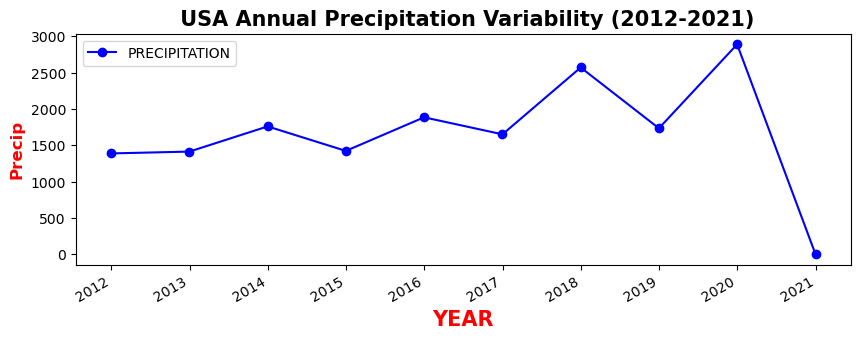

In [10]:
#11
anual_totals = usa_precip.resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
anual_totals.plot(color='blue', lw=1.5, marker='o', markersize=6, label= 'PRECIPITATION')
ax.set_title(' USA Annual Precipitation Variability (2012-2021)', fontweight='bold', fontsize=15, color='black')
ax.set_xlabel('YEAR', fontweight='bold', fontsize=15, color='red')
ax.set_ylabel('Precip', fontweight='bold', fontsize=12, color='red')
plt.legend(loc='upper left')
plt.show()

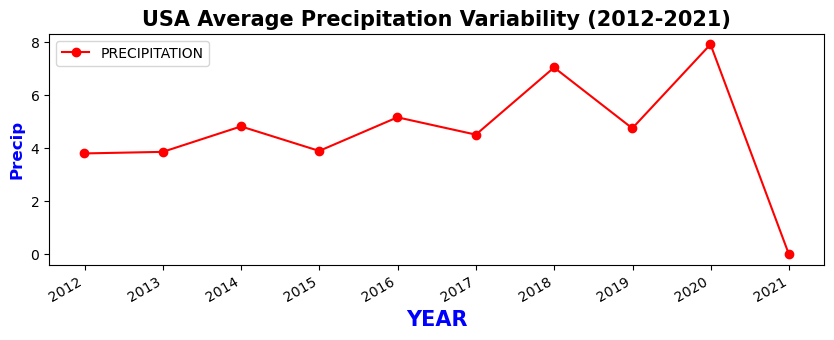

In [103]:
#12
anual_average = usa_precip.resample(datetime='1Y').mean()
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
anual_average.plot(color='red', lw=1.5, marker='o', markersize=6, label= 'PRECIPITATION')
ax.set_title('USA Average Precipitation Variability (2012-2021)', fontweight='bold', fontsize=15, color='black')
ax.set_xlabel('YEAR', fontweight='bold', fontsize=15, color='blue')
ax.set_ylabel('Precip', fontweight='bold', fontsize=12, color='blue')
plt.legend(loc='upper left')
plt.show()

In [11]:
#13
US=xr.open_mfdataset('C:\\Users\\paul\\Desktop\\USA\*.nc') 
US

<xarray.Dataset>
Dimensions:   (lon: 242, lat: 129, datetime: 3288)
Coordinates:
  * lon       (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat       (lat) float32 49.75 49.5 49.25 49.0 ... 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-01-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 129, 242), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [13]:
#14
USA_precip_I = US['precip']
USA_precip_I

<xarray.DataArray 'precip' (datetime: 3288, lat: 129, lon: 242)>
dask.array<concatenate, shape=(3288, 129, 242), dtype=float32, chunksize=(366, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat       (lat) float32 49.75 49.5 49.25 49.0 ... 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-01-01
Attributes:
    grid_mapping:  crs

In [14]:
#15
USa = USA_precip_I
monthly_dry_days = (USa < 1).groupby('datetime.month').sum(dim='datetime')
monthly_dry_days

<xarray.DataArray 'precip' (month: 12, lat: 129, lon: 242)>
dask.array<stack, shape=(12, 129, 242), dtype=int32, chunksize=(1, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat      (lat) float32 49.75 49.5 49.25 49.0 48.75 ... 18.5 18.25 18.0 17.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

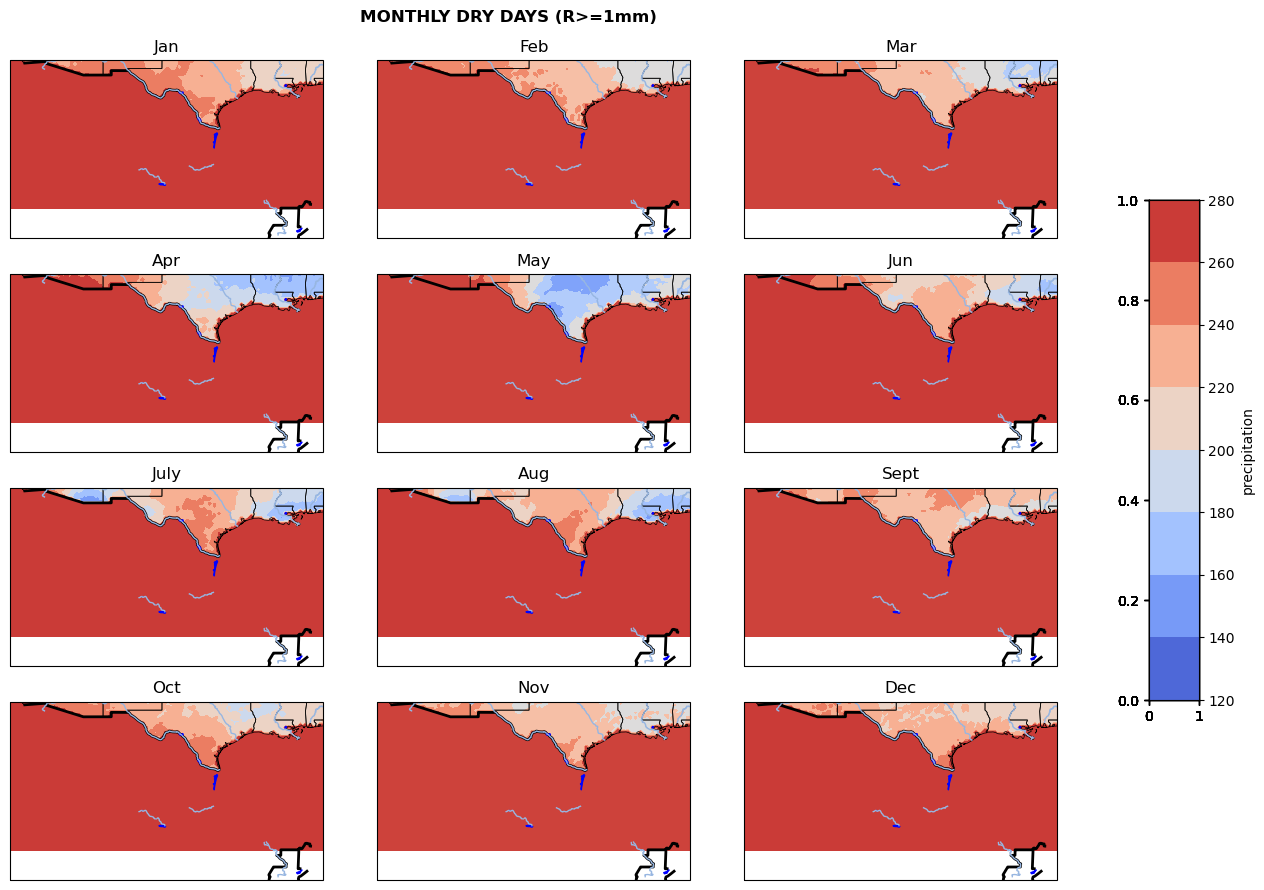

In [15]:
#16
#SPATIAL PLOTS FOR MONTHLY DRY  DAYS
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-118.5,-86.7,32.0,14.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(monthly_dry_days.lon, monthly_dry_days.lat, monthly_dry_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS (R>=1mm)', fontweight='bold');
#plt.savefig('done.png');

In [16]:
#17
USa = USA_precip_I
annual_dry_days = (USa < 1).groupby('datetime.year').sum(dim='datetime')
annual_dry_days

<xarray.DataArray 'precip' (year: 10, lat: 129, lon: 242)>
dask.array<stack, shape=(10, 129, 242), dtype=int32, chunksize=(1, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat      (lat) float32 49.75 49.5 49.25 49.0 48.75 ... 18.5 18.25 18.0 17.75
  * year     (year) int64 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

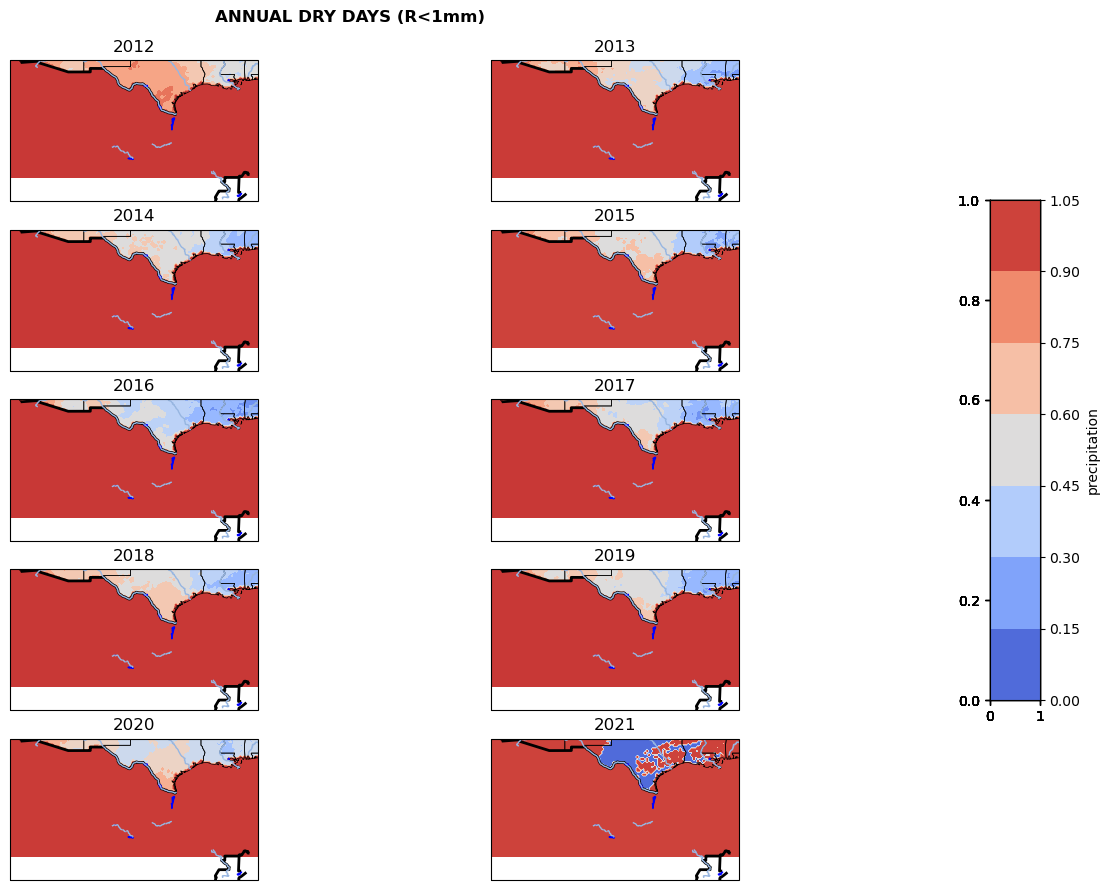

In [17]:
  #18
    #SPATIAL PLOTS FOR ANNUAL DRY DAYS
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-118.5,-86.7,32.0,14.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(annual_dry_days.lon, annual_dry_days.lat, annual_dry_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('ANNUAL DRY DAYS (R<1mm)', fontweight='bold');
#plt.savefig('done.png');

In [18]:
#19
USa = USA_precip_I
monthly_wet_days = (USa >= 1).groupby('datetime.month').sum(dim='datetime')
monthly_wet_days

<xarray.DataArray 'precip' (month: 12, lat: 129, lon: 242)>
dask.array<stack, shape=(12, 129, 242), dtype=int32, chunksize=(1, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat      (lat) float32 49.75 49.5 49.25 49.0 48.75 ... 18.5 18.25 18.0 17.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

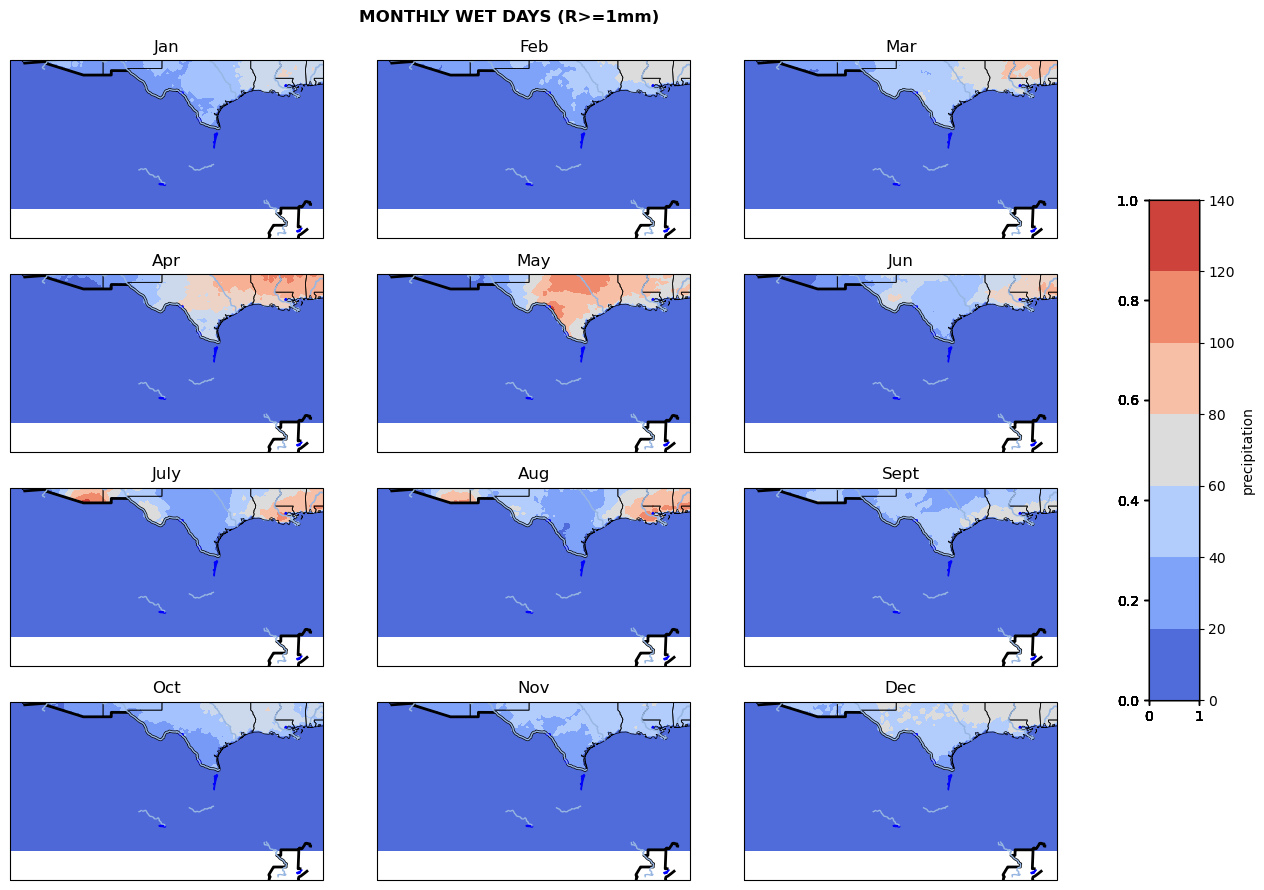

In [19]:
#20
#SPATIAL PLOTS FOR MONTHLY WET  DAYS
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-118.5,-86.7,32.0,14.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(monthly_wet_days.lon, monthly_wet_days.lat, monthly_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS (R>=1mm)', fontweight='bold');
#plt.savefig('done.png');

In [20]:
#21
USa = USA_precip_I
annual_wet_days = (USa >= 1).groupby('datetime.year').sum(dim='datetime')
annual_wet_days

<xarray.DataArray 'precip' (year: 10, lat: 129, lon: 242)>
dask.array<stack, shape=(10, 129, 242), dtype=int32, chunksize=(1, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat      (lat) float32 49.75 49.5 49.25 49.0 48.75 ... 18.5 18.25 18.0 17.75
  * year     (year) int64 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

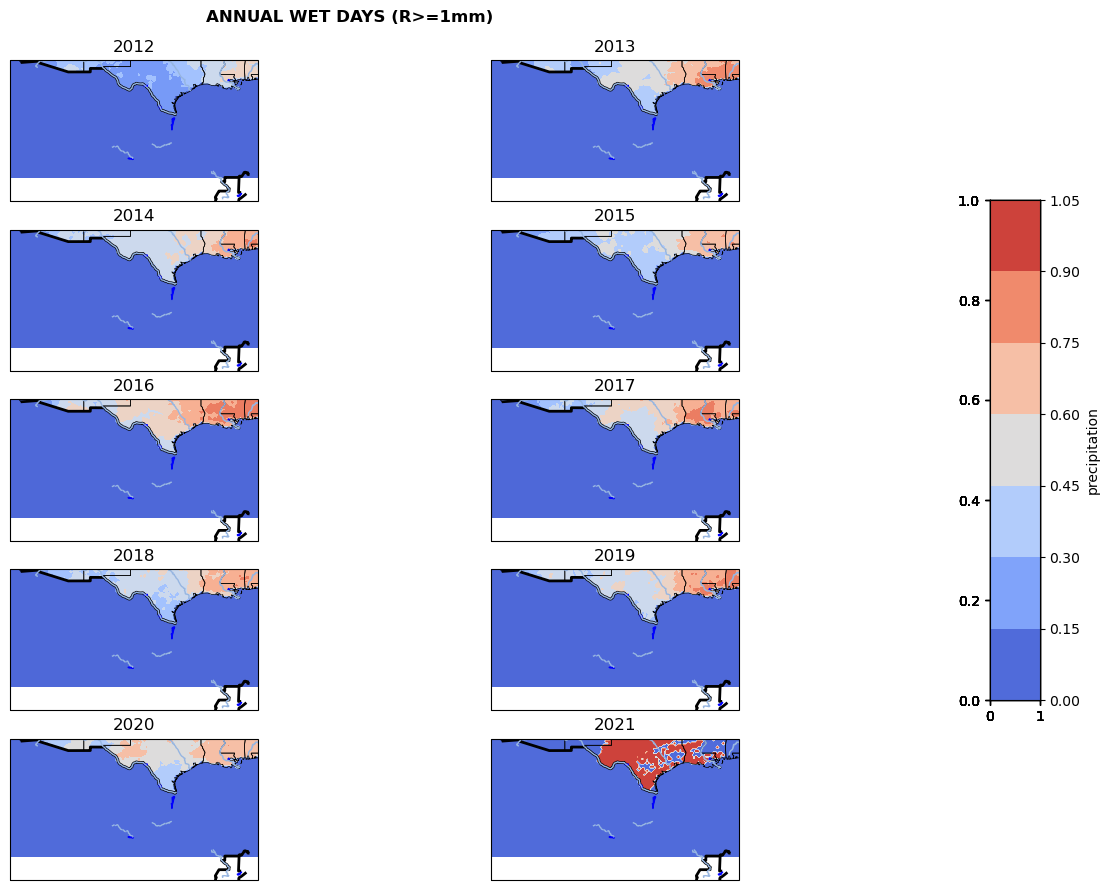

In [22]:
#22
#SPATIAL PLOTS FOR ANNUAL WET DAYS
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-118.5,-86.7,32.0,14.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(annual_wet_days.lon, annual_wet_days.lat, annual_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('ANNUAL WET DAYS (R>=1mm)', fontweight='bold');
#plt.savefig('done.png');

In [29]:
extremme_10mm = USA_precip_I
extremme_10mm_monthly_dry_days = (extremme_10mm > 10).groupby('datetime.month').sum(dim='datetime')
extremme_10mm_monthly_dry_days

<xarray.DataArray 'precip' (month: 12, lat: 129, lon: 242)>
dask.array<stack, shape=(12, 129, 242), dtype=int32, chunksize=(1, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat      (lat) float32 49.75 49.5 49.25 49.0 48.75 ... 18.5 18.25 18.0 17.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

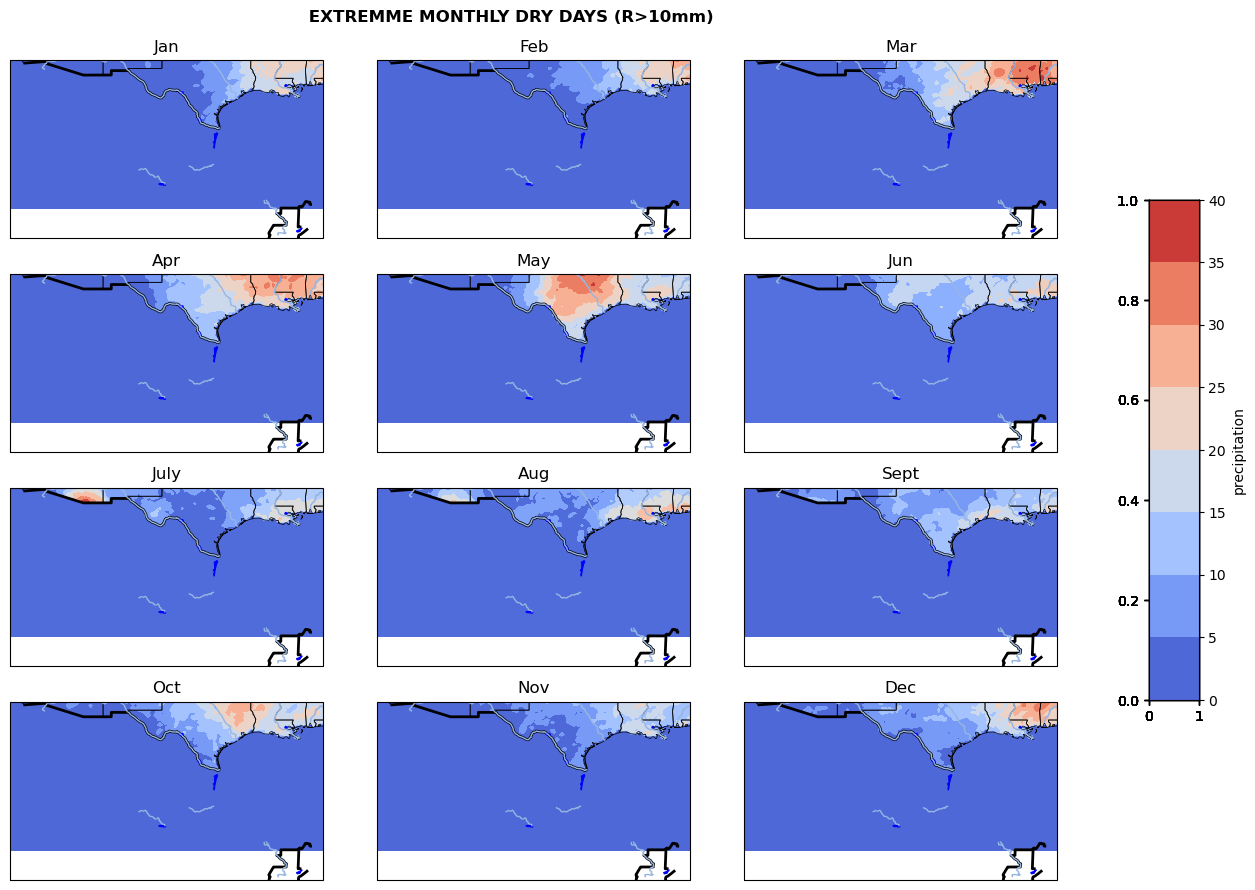

In [30]:
 #23
    #SPATIAL PLOTS FOR  EXTREMME MONTHLY DRY  DAYS(RR>10mm)
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-118.5,-86.7,32.0,14.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extremme_10mm_monthly_dry_days.lon, extremme_10mm_monthly_dry_days.lat, extremme_10mm_monthly_dry_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle(' EXTREMME MONTHLY DRY DAYS (R>10mm)', fontweight='bold');
#plt.savefig('done.png');

In [31]:
#24
extremme_10mm = USA_precip_I
extremme_10mm_annual_dry_days = (extremme_10mm > 10).groupby('datetime.year').sum(dim='datetime')
extremme_10mm_annual_dry_days

<xarray.DataArray 'precip' (year: 10, lat: 129, lon: 242)>
dask.array<stack, shape=(10, 129, 242), dtype=int32, chunksize=(1, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat      (lat) float32 49.75 49.5 49.25 49.0 48.75 ... 18.5 18.25 18.0 17.75
  * year     (year) int64 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

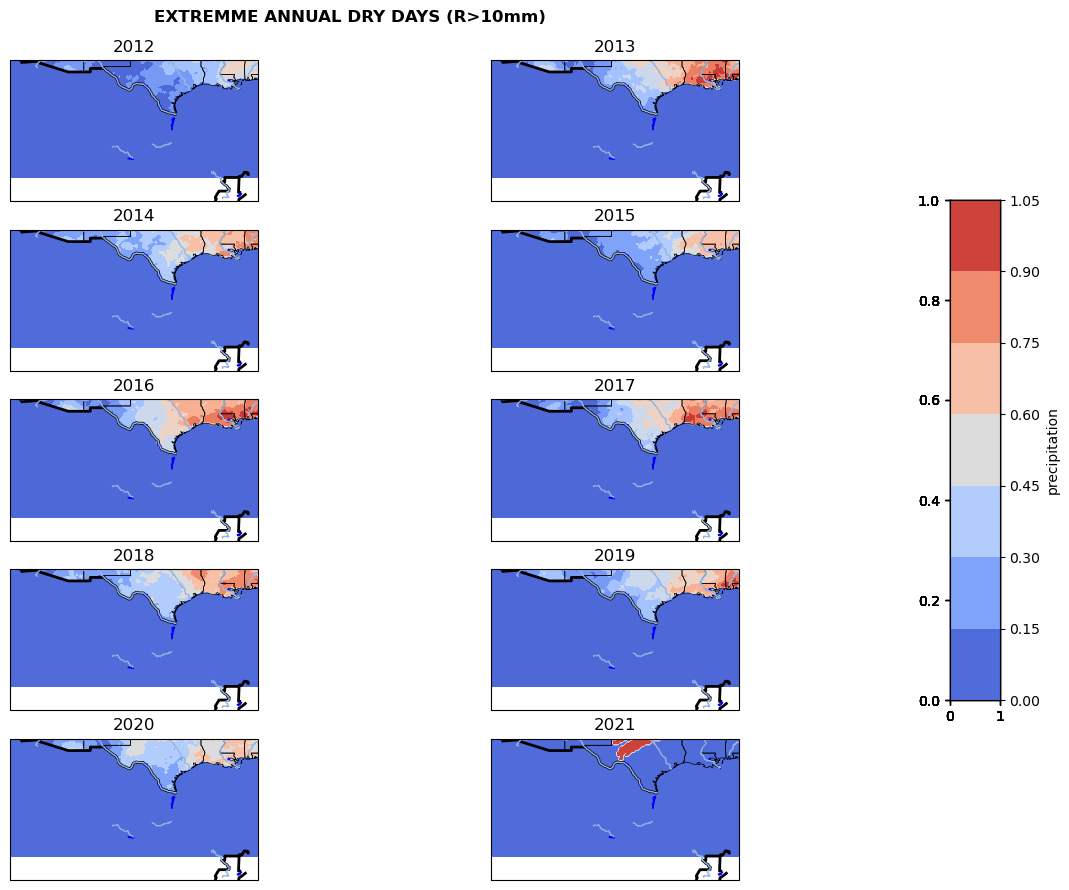

In [32]:
 #25
    #SPATIAL PLOTS FOR EXTREMME (RR>10mm) ANNUAL DRY DAYS
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-118.5,-86.7,32.0,14.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extremme_10mm_annual_dry_days.lon, extremme_10mm_annual_dry_days.lat, extremme_10mm_annual_dry_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.80,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('EXTREMME ANNUAL DRY DAYS (R>10mm)', fontweight='bold');
#plt.savefig('done.png');

In [33]:
#27
extremme_20mm = USA_precip_I
extremme_20mm_annual_wet_days = (extremme_20mm > 20).groupby('datetime.year').sum(dim='datetime')
extremme_20mm_annual_wet_days

<xarray.DataArray 'precip' (year: 10, lat: 129, lon: 242)>
dask.array<stack, shape=(10, 129, 242), dtype=int32, chunksize=(1, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat      (lat) float32 49.75 49.5 49.25 49.0 48.75 ... 18.5 18.25 18.0 17.75
  * year     (year) int64 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

In [34]:
#28
extremme_20mm = USA_precip_I
extremme_20mm_monthly_wet_days = (extremme_20mm > 20).groupby('datetime.month').sum(dim='datetime')
extremme_20mm_monthly_wet_days

<xarray.DataArray 'precip' (month: 12, lat: 129, lon: 242)>
dask.array<stack, shape=(12, 129, 242), dtype=int32, chunksize=(1, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat      (lat) float32 49.75 49.5 49.25 49.0 48.75 ... 18.5 18.25 18.0 17.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

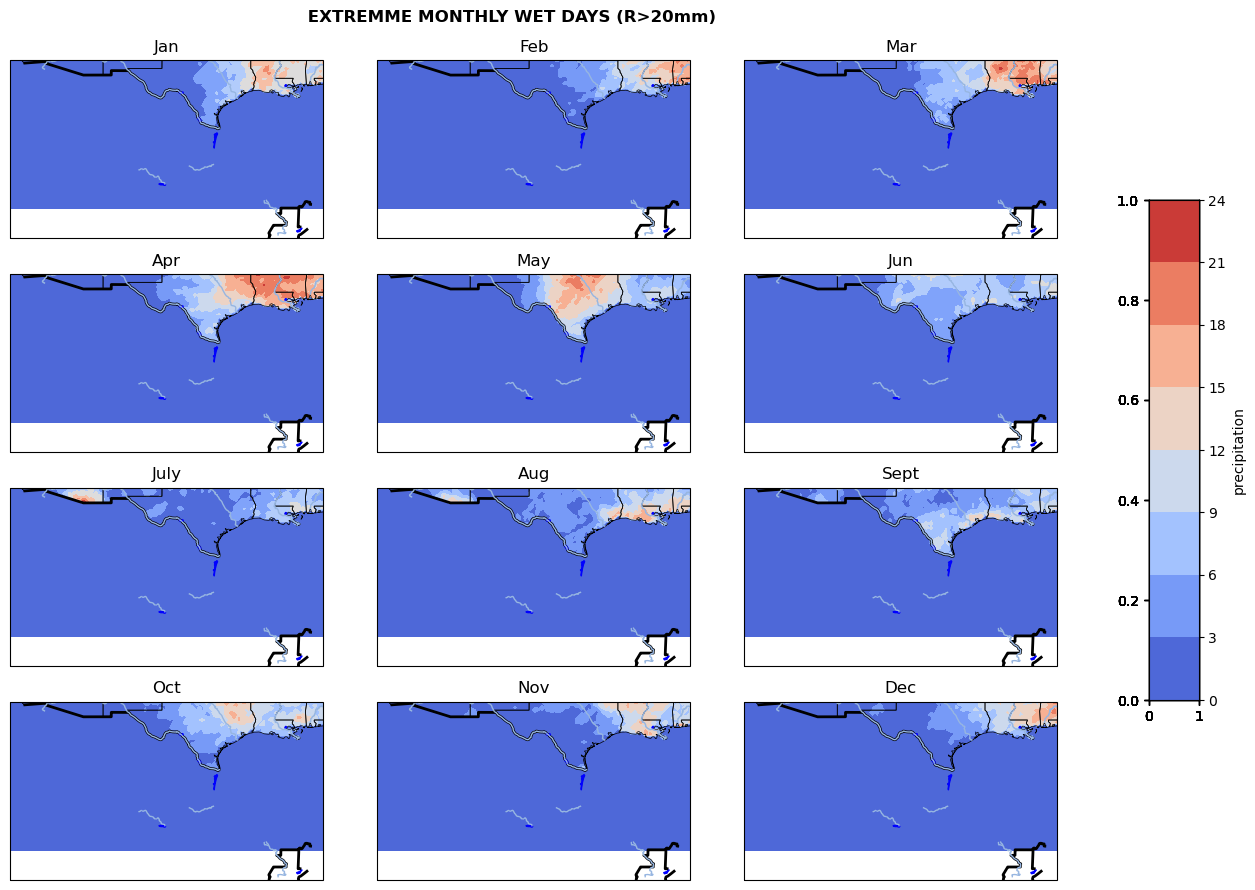

In [35]:
#29
#SPATIAL PLOTS FOR EXTREMME (RR>20mm) MONTHLY DRY  DAYS
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-118.5,-86.7,32.0,14.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extremme_20mm_monthly_wet_days.lon, extremme_20mm_monthly_wet_days.lat, extremme_20mm_monthly_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle(' EXTREMME MONTHLY WET DAYS (R>20mm)', fontweight='bold');
#plt.savefig('done.png');

In [36]:
extremme_10mm = USA_precip_I
extremme_10mm_annual_wet_days = (extremme_10mm > 20).groupby('datetime.year').sum(dim='datetime')
extremme_10mm_annual_wet_days

<xarray.DataArray 'precip' (year: 10, lat: 129, lon: 242)>
dask.array<stack, shape=(10, 129, 242), dtype=int32, chunksize=(1, 129, 242), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -124.8 -124.5 -124.2 -124.0 ... -65.0 -64.75 -64.5
  * lat      (lat) float32 49.75 49.5 49.25 49.0 48.75 ... 18.5 18.25 18.0 17.75
  * year     (year) int64 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

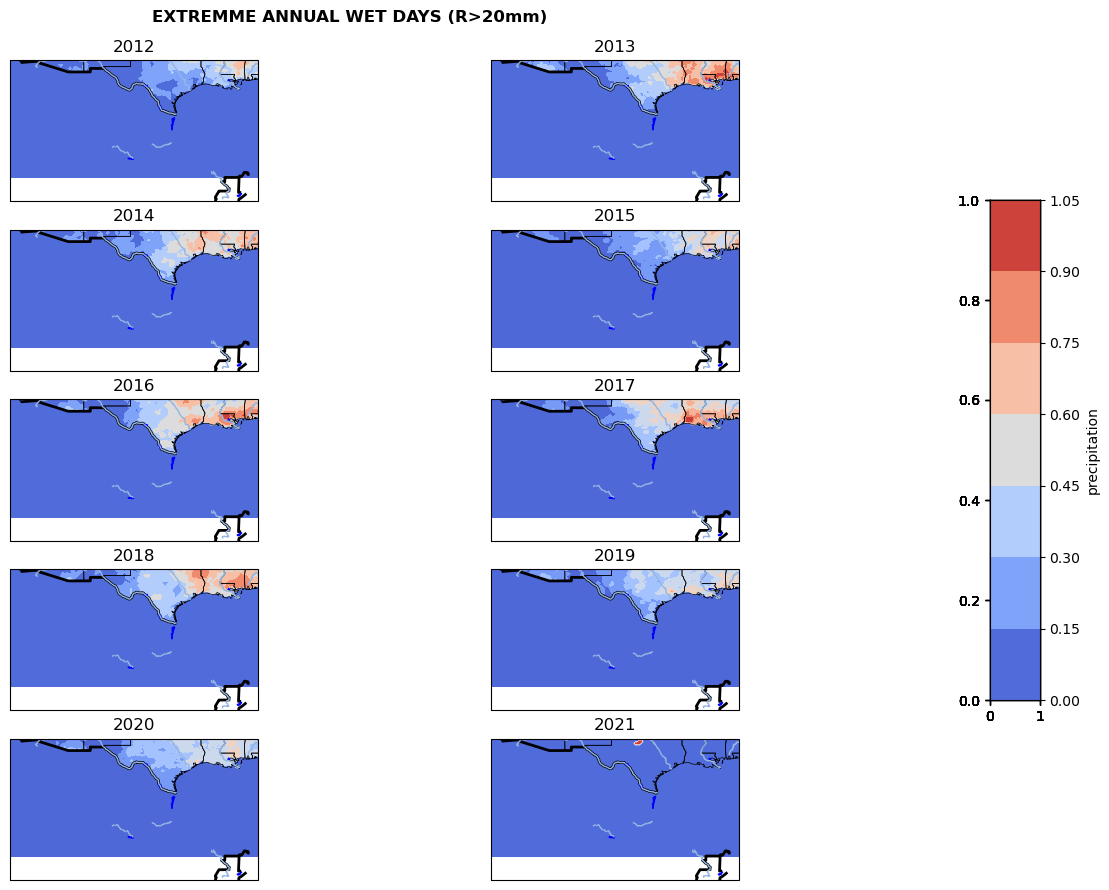

In [37]:
#30
#SPATIAL PLOTS FOR EXTREMME (RR>20mm) ANNUAL WET DAYS
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-118.5,-86.7,32.0,14.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extremme_20mm_annual_wet_days.lon, extremme_20mm_annual_wet_days.lat, extremme_20mm_annual_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('EXTREMME ANNUAL WET DAYS (R>20mm)', fontweight='bold');
#plt.savefig('done.png');

In [42]:
#31
annual_dry_days = (usa_precip < 1).resample(datetime='1Y').sum()

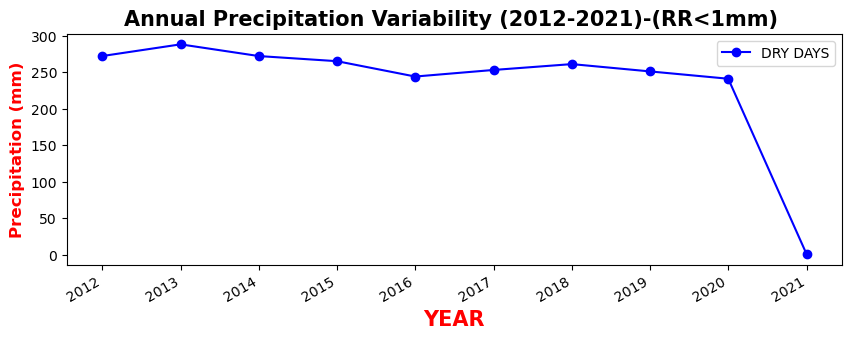

In [43]:
#32
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
annual_dry_days.plot(color='blue', lw=1.5, marker='o', markersize=6, label='DRY DAYS')
ax.set_title('Annual Precipitation Variability (2012-2021)-(RR<1mm) ', fontweight='bold', fontsize=15, color='black')
ax.set_xlabel('YEAR', fontweight='bold', fontsize=15, color='red')
ax.set_ylabel('Precipitation (mm)', fontweight='bold', fontsize=12, color='red')
plt.legend(loc='upper right')
plt.show()

In [44]:
#33
annual_wet_days = (usa_precip >= 1).resample(datetime='1Y').sum()


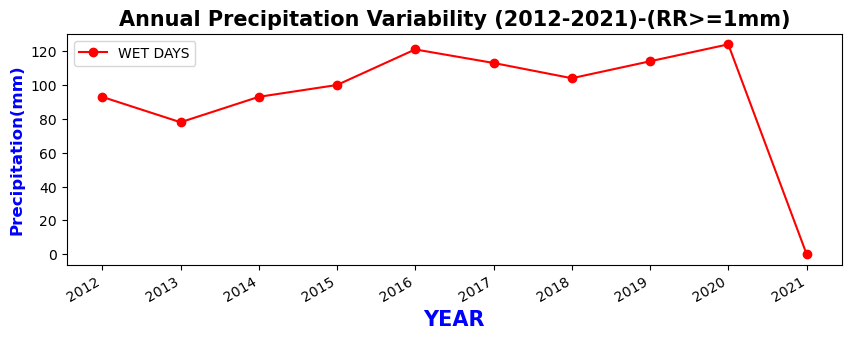

In [46]:
#34 
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
annual_wet_days.plot(color='red', lw=1.5, marker='o', markersize=6, label='WET DAYS')
ax.set_title('Annual Precipitation Variability (2012-2021)-(RR>=1mm)', fontweight='bold', fontsize=15, color='black')
ax.set_xlabel('YEAR', fontweight='bold', fontsize=15, color='blue')
ax.set_ylabel('Precipitation(mm)', fontweight='bold', fontsize=12, color='blue')
plt.legend(loc='upper left')
plt.show()

In [47]:
#35
Annual_extreme_precip_10mm = (usa_precip > 10).resample(datetime='1Y').sum()


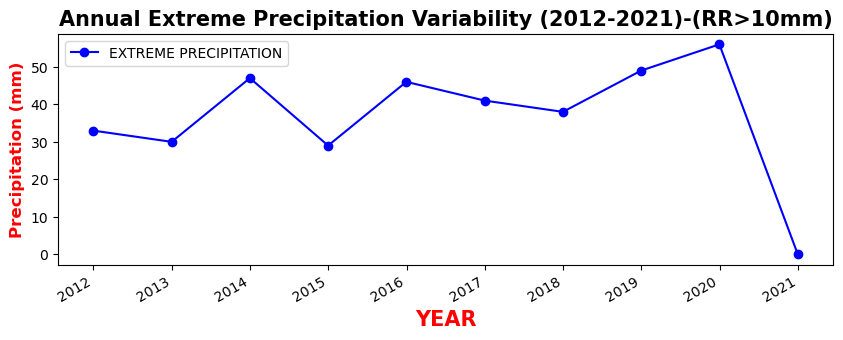

In [48]:
#36
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
Annual_extreme_precip_10mm.plot(color='blue', lw=1.5, marker='o', markersize=6, label='EXTREME PRECIPITATION')
ax.set_title('Annual Extreme Precipitation Variability (2012-2021)-(RR>10mm)', fontweight='bold', fontsize=15, color='black')
ax.set_xlabel('YEAR', fontweight='bold', fontsize=15, color='red')
ax.set_ylabel('Precipitation (mm)', fontweight='bold', fontsize=12, color='red')
plt.legend(loc='upper left')
plt.show()

In [49]:
#37
Annual_extreme_precip_20mm = (usa_precip > 20).resample(datetime='1Y').sum()


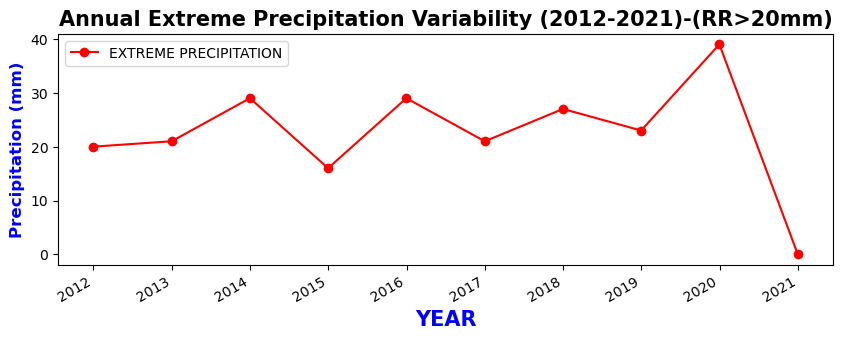

In [50]:
#38
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
Annual_extreme_precip_20mm.plot(color='RED', lw=1.5, marker='o', markersize=6, label='EXTREME PRECIPITATION')
ax.set_title('Annual Extreme Precipitation Variability (2012-2021)-(RR>20mm)', fontweight='bold', fontsize=15, color='black')
ax.set_xlabel('YEAR', fontweight='bold', fontsize=15, color='blue')
ax.set_ylabel('Precipitation (mm)', fontweight='bold', fontsize=12, color='blue')
plt.legend(loc='upper left')
plt.show()